# Exploratory Data Analysis

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

# the more advanced python visualization library
import seaborn as sns

# apply style to all the charts
sns.set_style('whitegrid')

# convert scientific notation to decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# Load the data
df = pd.read_csv('data/house_pricing.csv')
df['date'] = pd.to_datetime(df['date'])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,walking_score,transit_score,bike_score,median_income,mean_income,population
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,...,47.51,-122.26,1340,5650,24,46.00,22.00,55777.00,65498.00,24092
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,...,47.72,-122.32,1690,7639,67,59.00,64.00,47910.00,60487.00,30826
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,...,47.74,-122.23,2720,8062,14,36.00,nan,86310.00,100546.00,20419
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,...,47.52,-122.39,1360,5000,74,48.00,51.00,77761.00,95355.00,14770
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,...,47.62,-122.05,1800,7503,9,0.00,nan,134159.00,157543.00,25748
5,7237550310,2014-05-12,1225000.00,4,4.50,5420,101930,1.00,0,0,...,47.66,-122.00,4760,101930,16,0.00,nan,114287.00,149341.00,18784
6,1321400060,2014-06-27,257500.00,3,2.25,1715,6819,2.00,0,0,...,47.31,-122.33,2238,6819,65,45.00,nan,52410.00,63083.00,44151
7,2008000270,2015-01-15,291850.00,3,1.50,1060,9711,1.00,0,0,...,47.41,-122.31,1650,9711,22,nan,nan,59070.00,69813.00,34584
8,2414600126,2015-04-15,229500.00,3,1.00,1780,7470,1.00,0,0,...,47.51,-122.34,1780,8113,39,40.00,nan,53913.00,69002.00,25922
9,3793500160,2015-03-12,323000.00,3,2.50,1890,6560,2.00,0,0,...,47.37,-122.03,2390,7570,2,nan,nan,94082.00,104078.00,31171


## Data Perspective
- One variable
    - Numeric variables
        - continuous: average income
        - discrete: population
    - Categorical variables
        - ordinal: grade
        - nominal: house, apartment, townhouse, etc.
- Multiple variables
    - Numeric x Numeric
    - Categorical x Numeric
    - Categorical x Categorical

## One Variable (numeric)

count     21165.00
mean     518266.00
std      304494.00
min       75000.00
25%      320000.00
50%      446950.00
75%      629950.00
max     5570000.00
Name: price, dtype: float64


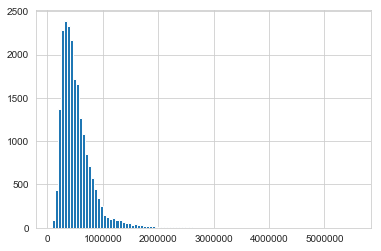

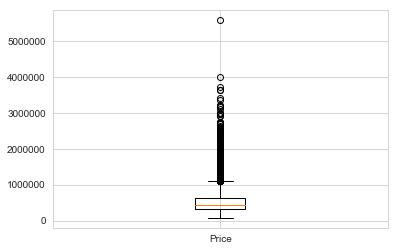

In [3]:
# Analize pricing distribution

# Histogram
print(df['price'].describe().round())
plt.hist(df['price'], bins=100)
plt.show()
# Box plot
plt.boxplot(df['price'])
plt.xticks([1], ['Price'], rotation='horizontal')
plt.show()

## One Variable (categorical)

3    9742
4    6703
2    2747
5    1521
6     253
1     199
Name: bedrooms, dtype: int64


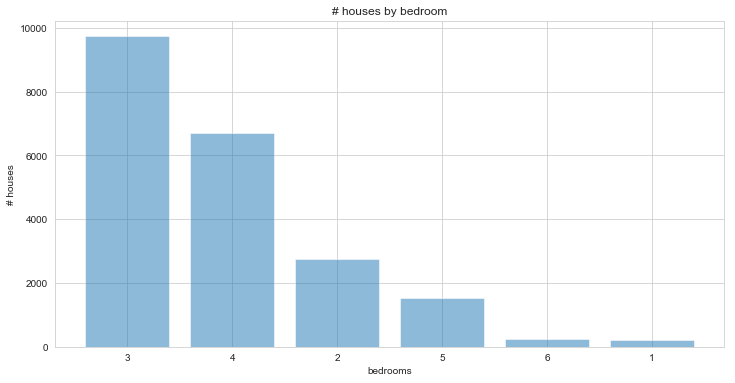

In [4]:
# Analize zipcode distribution
print(df['bedrooms'].value_counts())

# Bar Chart
plt.figure(figsize=(12,6))
plt.title('# houses by bedroom')
plt.xlabel('bedrooms')
plt.ylabel('# houses')

labels = df['bedrooms'].value_counts().index
values = df['bedrooms'].value_counts().values

y_pos = range(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.show()

## Multiple variables (Numeric x Numeric)

In [5]:
# Correlation
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,lat,long,sqft_living15,sqft_lot15,walking_score,transit_score,bike_score,median_income,mean_income,population
id,1.00,-0.01,0.01,0.01,-0.01,-0.13,0.02,-0.00,0.02,-0.02,...,-0.00,0.02,-0.00,-0.14,0.00,-0.01,0.03,0.01,0.01,0.03
price,-0.01,1.00,0.32,0.50,0.68,0.07,0.26,0.09,0.31,0.04,...,0.35,0.03,0.59,0.07,0.10,0.06,-0.07,0.43,0.56,-0.15
bedrooms,0.01,0.32,1.00,0.52,0.60,0.03,0.17,-0.03,0.06,0.02,...,-0.02,0.15,0.41,0.03,-0.12,-0.14,-0.17,0.17,0.17,0.02
bathrooms,0.01,0.50,0.52,1.00,0.74,0.07,0.51,0.00,0.14,-0.13,...,0.02,0.24,0.56,0.07,-0.14,-0.18,-0.10,0.32,0.31,-0.06
sqft_living,-0.01,0.68,0.60,0.74,1.00,0.16,0.35,0.01,0.23,-0.06,...,0.05,0.26,0.76,0.17,-0.19,-0.23,-0.22,0.39,0.40,-0.10
sqft_lot,-0.13,0.07,0.03,0.07,0.16,1.00,-0.02,0.02,0.06,-0.01,...,-0.08,0.23,0.15,0.71,-0.21,-0.26,-0.37,0.13,0.10,-0.15
floors,0.02,0.26,0.17,0.51,0.35,-0.02,1.00,0.00,0.00,-0.27,...,0.05,0.13,0.27,-0.02,0.01,-0.01,0.20,0.17,0.16,-0.04
waterfront,-0.00,0.09,-0.03,0.00,0.01,0.02,0.00,1.00,0.29,0.02,...,-0.03,-0.05,0.03,0.03,-0.03,-0.02,-0.05,0.01,0.02,-0.05
view,0.02,0.31,0.06,0.14,0.23,0.06,0.00,0.29,1.00,0.05,...,-0.00,-0.08,0.25,0.06,-0.01,0.02,-0.12,0.03,0.06,-0.10
condition,-0.02,0.04,0.02,-0.13,-0.06,-0.01,-0.27,0.02,0.05,1.00,...,-0.02,-0.10,-0.10,0.00,0.07,0.04,-0.05,-0.06,-0.03,0.05


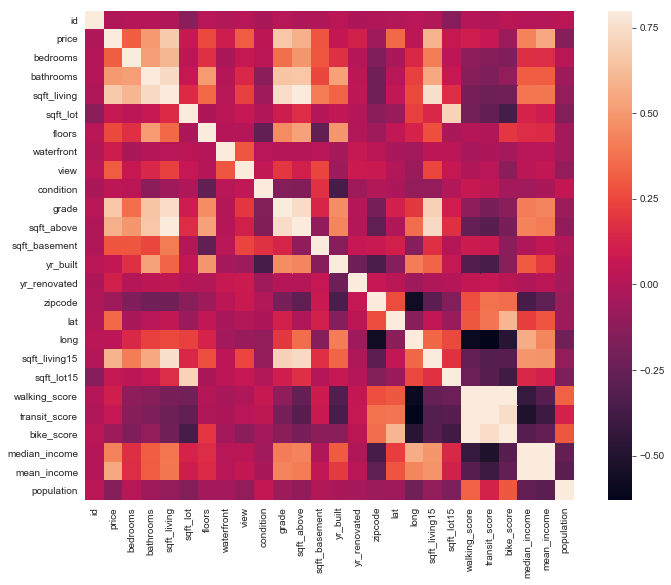

In [6]:
# heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

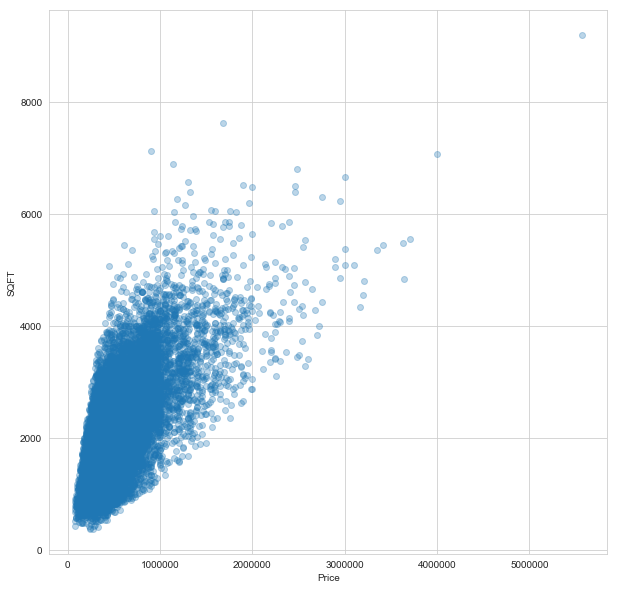

In [7]:
# Visualization : correlation between Price x SQFT

plt.figure(figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('SQFT')

plt.plot(df['price'], df['sqft_living'], 'o', alpha=0.3)
plt.show()

Correlation:              price  mean_income
price         1.00         0.56
mean_income   0.56         1.00


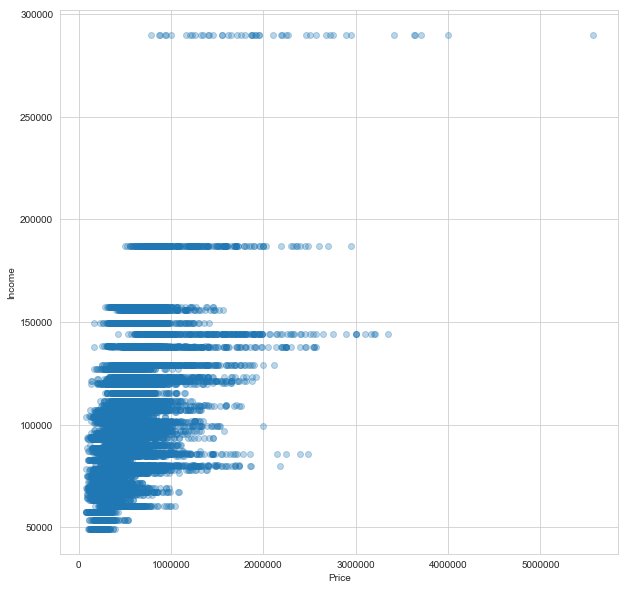

In [8]:
# TODO: Create a scatterplot Price x Mean Income
# TODO: What is the correlation between Price x Mean Income

print('Correlation:', df[['price', 'mean_income']].corr())

plt.figure(figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('Income')

plt.plot(df['price'], df['mean_income'], 'o', alpha=0.3)
plt.show()

## Multiple variables (Categorical x Numeric)

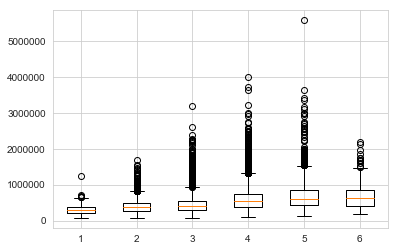

In [9]:
# Box plot to show the distribution between bedrooms x price
values = []
labels = []
for bdr in sorted(df['bedrooms'].unique()):
    labels.append(bdr)
    values.append(list(df[df['bedrooms']==bdr]['price'].values))

plt.boxplot(values)
plt.xticks(range(1,len(labels)+1), labels, rotation='horizontal')
plt.show()

## Multiple variables (Categorical x Categorical)

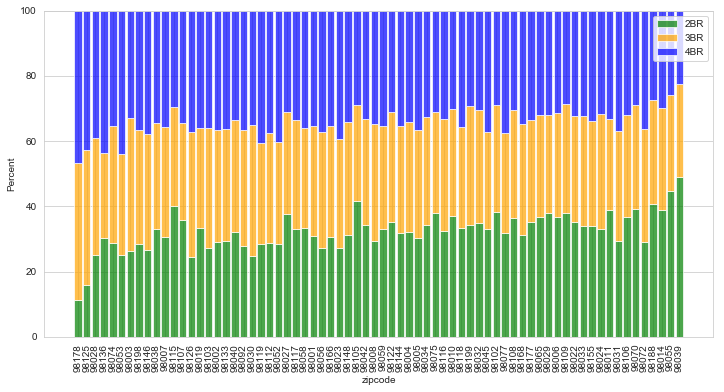

In [10]:
# Count of number of houses by zipcode and bedrooms

n_bedrooms = [2,3,4]
zipcodes = df['zipcode'].unique()
r = range(len(zipcodes))

df_group = df.groupby(['zipcode', 'bedrooms'])['id'].count().reset_index()
df_group = df.pivot_table(index='zipcode', columns = 'bedrooms', values='id')
df_group = df_group[[2,3,4]]
df_group.columns = ['2BR','3BR','4BR']
df_group = df_group.sort_values(['2BR','3BR','4BR'])

raw_data = {'2BR': df_group['2BR'].values, 
            '3BR': df_group['3BR'].values, 
            '4BR': df_group['4BR'].values
           }

# From raw value to percentage
totals = [float(i+j+k) for i,j,k in zip(raw_data['2BR'], raw_data['3BR'], raw_data['4BR'])]
br2Bars = [i / j * 100 for i,j in zip(raw_data['2BR'], totals)]
br3Bars = [i / j * 100 for i,j in zip(raw_data['3BR'], totals)]
br4Bars = [i / j * 100 for i,j in zip(raw_data['4BR'], totals)]

# plot
barWidth = 0.85
names = zipcodes
plt.figure(figsize=(12,6))
# Create green Bars
plt.bar(r, br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='g', label='2BR')
# Create orange Bars
plt.bar(r, br3Bars, bottom=br2Bars, edgecolor='white', width=barWidth, alpha=0.7, color='orange', label='3BR')
# Create blue Bars
plt.bar(r, br4Bars, bottom=[i+j for i,j in zip(br2Bars, br3Bars)], edgecolor='white', width=barWidth, alpha=0.7, color='b', label='4BR')

# Limit on y-axis
plt.ylim(0,100)

# Custom x axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Percent")
plt.xlabel("zipcode")

plt.legend()

# Show graphic
plt.show()

## Business Perspective
"An approximate answer to the right question is worth a great deal more than a precise answer to the wrong question." John Tukey

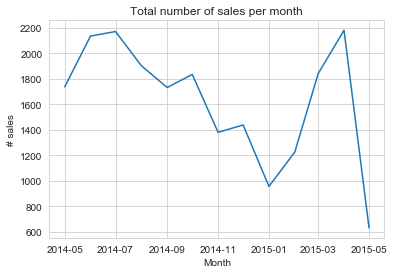

date
2014-05-01    1737
2014-06-01    2136
2014-07-01    2172
2014-08-01    1903
2014-09-01    1732
2014-10-01    1835
2014-11-01    1380
2014-12-01    1438
2015-01-01     955
2015-02-01    1225
2015-03-01    1841
2015-04-01    2182
2015-05-01     629
Freq: MS, Name: price, dtype: int64

In [11]:
# What is the total number of sales per month?

df_group = df.groupby([df['date'].dt.to_period('M')])['price'].count()

# chart
df_group.index = df_group.index.to_timestamp()
plt.title('Total number of sales per month')
plt.xlabel('Month')
plt.ylabel('# sales')
plt.plot(df_group.index, df_group.values, '-')
plt.show()

# table
df_group

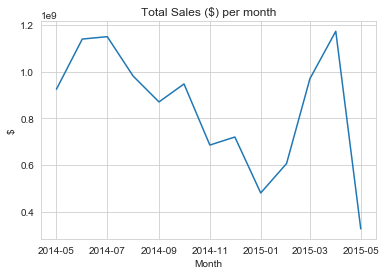

date
2014-05-01    924249090.00
2014-06-01   1139387745.00
2014-07-01   1149641358.00
2014-08-01    980751787.00
2014-09-01    869951373.00
2014-10-01    946989353.00
2014-11-01    685052934.00
2014-12-01    719537956.00
2015-01-01    479770830.00
2015-02-01    605830774.00
2015-03-01    969413826.00
2015-04-01   1172895973.00
2015-05-01    325626530.00
Freq: MS, Name: price, dtype: float64

In [12]:
# What is the total sales ($) per month?

df_group = df.groupby([df['date'].dt.to_period('M')])['price'].sum()

# chart
df_group.index = df_group.index.to_timestamp()
plt.title('Total Sales ($) per month')
plt.xlabel('Month')
plt.ylabel('$')
plt.plot(df_group.index, df_group.values, '-')
plt.show()

# table
df_group

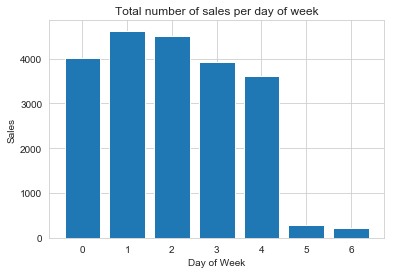

date
0    4021
1    4620
2    4491
3    3922
4    3601
5     282
6     228
Name: price, dtype: int64

In [13]:
# What is the total number of sales per day of week?

df_group = df.groupby([df['date'].dt.dayofweek])['price'].count()

# chart
plt.title('Total number of sales per day of week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
values = df_group.values
bars = [str(x) for x in df_group.index]
y_pos = np.arange(len(bars))
plt.bar(y_pos, values, align='center')
plt.xticks(y_pos, bars)
plt.show()

df_group

In [14]:
# What is the average price by zip code?
df.groupby(by=['zipcode'])['price'].mean().sort_values()

zipcode
98002    234284.04
98168    238008.92
98032    248927.66
98148    273986.18
98001    276637.11
98023    279993.23
98188    280472.59
98198    283963.56
98003    284387.44
98178    293929.85
98031    294436.17
98030    295133.82
98055    301619.79
98042    303617.21
98022    304324.46
98106    312284.61
98092    322294.41
98146    338273.75
98058    342938.88
98108    355678.52
98038    357789.46
98133    380018.53
98155    401461.64
98118    402807.25
98056    407292.45
98019    415830.81
98126    416833.95
98010    423665.99
98045    424817.01
98014    426500.18
           ...    
98072    557694.32
98107    561628.17
98117    563718.08
98024    569856.58
98103    570616.92
98027    588274.21
98008    592259.38
98029    592727.97
98007    598183.83
98116    599908.60
98122    599933.52
98115    603853.69
98177    627364.56
98052    633543.23
98053    655456.90
98074    661827.13
98077    665689.36
98033    755747.93
98199    757828.05
98075    766801.75
98005    778335.58
9811

In [15]:
# Identify the zip codes with highest and lowest price per square foot
df['price_x_sqft_living'] = df['price']/df['sqft_living']
df.groupby(by=['zipcode'])['price_x_sqft_living'].mean().sort_values()

zipcode
98023   147.52
98001   151.08
98002   151.17
98032   154.66
98092   154.90
98030   155.06
98003   156.73
98031   159.98
98042   163.80
98188   168.69
98038   172.62
98168   175.54
98198   175.62
98058   177.05
98022   178.57
98055   180.47
98178   183.52
98148   186.01
98019   202.93
98059   205.69
98065   210.09
98010   210.10
98056   212.85
98146   219.46
98045   220.07
98166   221.88
98014   221.92
98028   223.83
98108   224.44
98011   225.61
         ...  
98075   264.13
98053   268.95
98029   270.93
98070   275.25
98125   277.88
98052   278.21
98177   287.93
98007   289.95
98126   292.06
98006   294.29
98008   295.23
98144   307.20
98005   311.69
98136   334.17
98033   338.65
98116   347.05
98115   353.01
98117   363.17
98122   363.66
98103   369.48
98199   373.06
98107   381.72
98040   382.77
98105   403.10
98119   425.12
98102   426.01
98109   430.77
98112   435.72
98004   473.34
98039   566.32
Name: price_x_sqft_living, Length: 70, dtype: float64

Correlation:        price  grade
price   1.00   0.67
grade   0.67   1.00


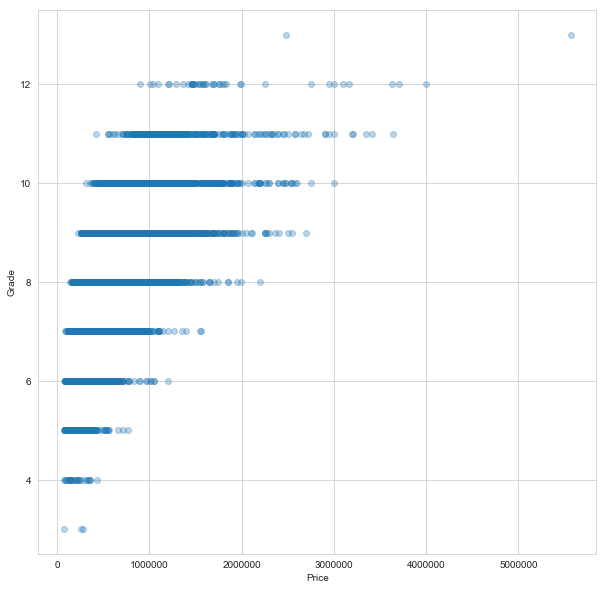

In [16]:
# Is the grade a good indicator of price?

# Analysis
print('Correlation:', df[['price', 'grade']].corr())

# Chart
plt.figure(figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('Grade')
plt.plot(df['price'], df['grade'], 'o', alpha=0.3)
plt.show()

Correlation:                price  walking_score
price           1.00           0.10
walking_score   0.10           1.00


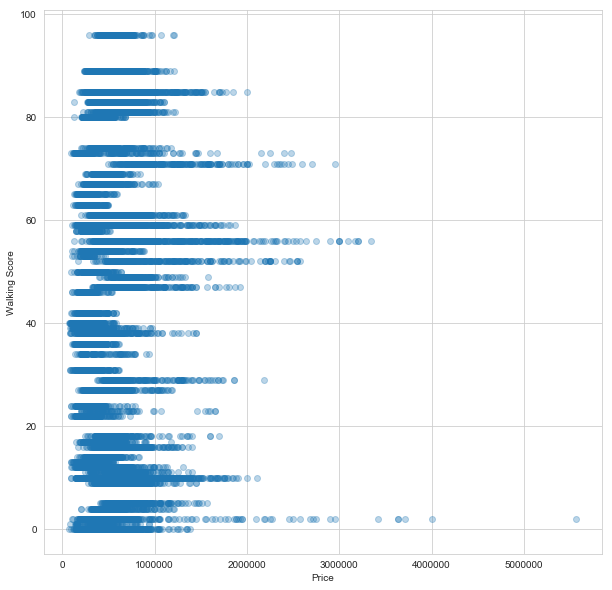

In [17]:
# Is the walking score a good indicator of price?

# Analysis
print('Correlation:', df[['price', 'walking_score']].corr())

# Chart
plt.figure(figsize=(10,10))
plt.xlabel('Price')
plt.ylabel('Walking Score')
plt.plot(df['price'], df['walking_score'], 'o', alpha=0.3)
plt.show()